In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize':(15,6)})
plt.rcParams.update({'font.size':18})

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(3)

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,...,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Age,Family_Size,Segmentation
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,22,4.0,D
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,38,3.0,A
2,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,67,1.0,B


In [4]:
# correlation metrix function
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1] ## mask the upper triangle of the corr_mat so that it will only show the lower triangle
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='OrRd',square=False,lw=2,annot=True,cbar=False)
    ax.set_title('Shifted Linear Correlation Matrix')


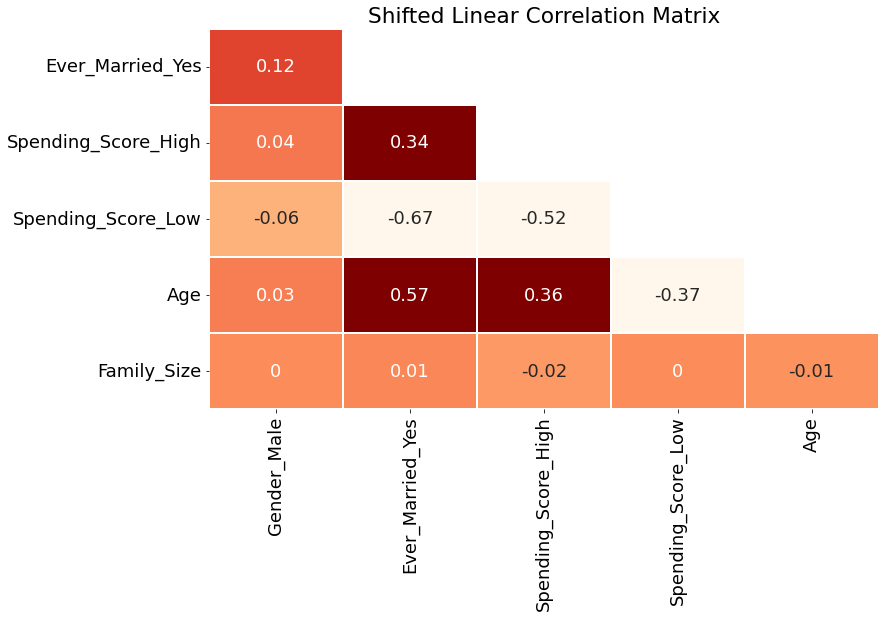

In [9]:
DF = df[['Gender_Male', 'Ever_Married_Yes','Spending_Score_High', 'Spending_Score_Low','Age', 'Family_Size']]
corrMat(DF)

### Feature Engineering Process

In [ ]:
## creating conditional binary variables
#  ---> gender x profession
# gender, married, graduated to all
# Profession to work experience, spending
# work experience to spending

In [14]:
df.columns

Index(['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_unknown',
       'Work_Experience_Entry', 'Work_Experience_High',
       'Work_Experience_Intermediate', 'Work_Experience_unknown',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_2',
       'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6',
       'Var_1_Cat_7', 'Age', 'Family_Size', 'Segmentation'],
      dtype='object')

In [15]:
all = ['Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_unknown',
       'Work_Experience_Entry', 'Work_Experience_High',
       'Work_Experience_Intermediate', 'Work_Experience_unknown',
       'Spending_Score_High', 'Spending_Score_Low']
pro = ['Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_unknown']
work = ['Work_Experience_Entry', 'Work_Experience_High',
       'Work_Experience_Intermediate', 'Work_Experience_unknown']
spending = ['Spending_Score_High', 'Spending_Score_Low']
general = ['Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes']

In [17]:
# gender, married, graduated to all
for i in all:
    for g in general:
        df[i + '_' + g] = df[i]*df[g]

# Profession to work experience, spending
ws = work + spending
for p in pro:
    for w in ws:
        df[p + '_' + w] = df[p]*df[w]

# work experience to spending
for w in work:
    for s in spending:
        df[w + '_' + s] = df[w]*df[s]


/var/folders/2r/tdlycv1d6fxbcgbzp8dzbnjr0000gn/T/ipykernel_26557/911272159.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[p + '_' + w] = df[p]*df[w]
/var/folders/2r/tdlycv1d6fxbcgbzp8dzbnjr0000gn/T/ipykernel_26557/911272159.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[p + '_' + w] = df[p]*df[w]
/var/folders/2r/tdlycv1d6fxbcgbzp8dzbnjr0000gn/T/ipykernel_26557/911272159.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [19]:
df

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,...,Profession_unknown_Spending_Score_High,Profession_unknown_Spending_Score_Low,Work_Experience_Entry_Spending_Score_High,Work_Experience_Entry_Spending_Score_Low,Work_Experience_High_Spending_Score_High,Work_Experience_High_Spending_Score_Low,Work_Experience_Intermediate_Spending_Score_High,Work_Experience_Intermediate_Spending_Score_Low,Work_Experience_unknown_Spending_Score_High,Work_Experience_unknown_Spending_Score_Low
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7898,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7899,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7900,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df.to_csv('feature_engineered_data.csv', index=False)